<a href="https://colab.research.google.com/github/prasannashrestha011/ML_exercises/blob/main/DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
import pathlib
data_dir = pathlib.Path('/content/datasets/flower_photos/flower_photos')
data_dir

PosixPath('/content/datasets/flower_photos/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [6]:
roses=list(data_dir.glob("roses/*"))
roses[:5]

[PosixPath('/content/datasets/flower_photos/flower_photos/roses/3742168238_d961937e68_n.jpg'),
 PosixPath('/content/datasets/flower_photos/flower_photos/roses/685724528_6cd5cbe203.jpg'),
 PosixPath('/content/datasets/flower_photos/flower_photos/roses/8853083579_dd1dfa3188.jpg'),
 PosixPath('/content/datasets/flower_photos/flower_photos/roses/4797595918_79887b1229_n.jpg'),
 PosixPath('/content/datasets/flower_photos/flower_photos/roses/4900231976_f8ced2b42a_n.jpg')]

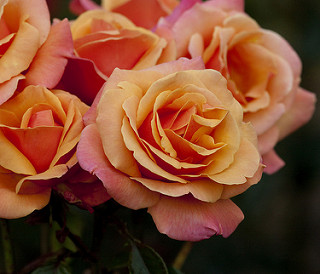

In [7]:
PIL.Image.open(roses[0])

array([[[ 12,  29,  26],
        [ 12,  29,  26],
        [ 12,  29,  26],
        ...,
        [110, 141, 196],
        [ 93, 135, 182],
        [101, 155, 196]],

       [[ 12,  29,  26],
        [ 12,  29,  26],
        [ 12,  29,  26],
        ...,
        [ 95, 132, 188],
        [ 99, 139, 191],
        [ 99, 144, 188]],

       [[ 12,  29,  26],
        [ 12,  29,  26],
        [ 11,  28,  25],
        ...,
        [ 87, 128, 183],
        [ 92, 131, 186],
        [106, 143, 195]],

       ...,

       [[ 11,  17,  22],
        [ 12,  18,  23],
        [ 13,  19,  24],
        ...,
        [  6,  17,  21],
        [  6,  18,  24],
        [  7,  21,  27]],

       [[ 13,  17,  22],
        [ 16,  20,  25],
        [ 14,  18,  23],
        ...,
        [  5,  13,  20],
        [  2,  11,  20],
        [  6,  17,  25]],

       [[ 13,  17,  22],
        [ 16,  20,  25],
        [ 14,  18,  23],
        ...,
        [  1,   9,  16],
        [  0,   6,  15],
        [  2,  13,  21]]], dtype=uint8)
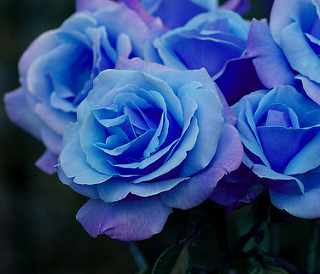

In [49]:
cv_img=cv2.imread(roses[0])
# flipping image ,0=vertical & 1=horizontal
cv2.flip(cv_img,1)

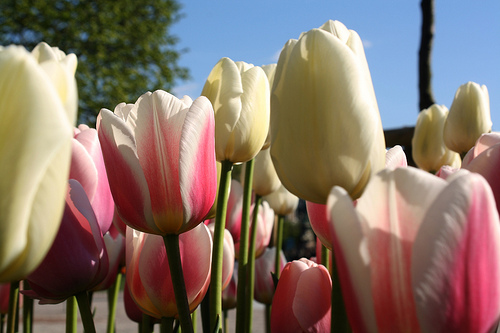

In [9]:
tulips=list(data_dir.glob("tulips/*"))
tulips[:5]
PIL.Image.open(tulips[1])

In [13]:
flowers_images_dict={
    'daisy':list(data_dir.glob("daisy/*")),
    'dandelion':list(data_dir.glob("dandelion/*")),
    'roses':list(data_dir.glob("roses/*")),
    'sunflowers':list(data_dir.glob("sunflowers/*")),
    'tulips':list(data_dir.glob("tulips/*"))
}
flowers_images_labels={
    'daisy':0,
    'dandelion':1,
    'roses':2,
    'sunflowers':3,
    'tulips':4
}


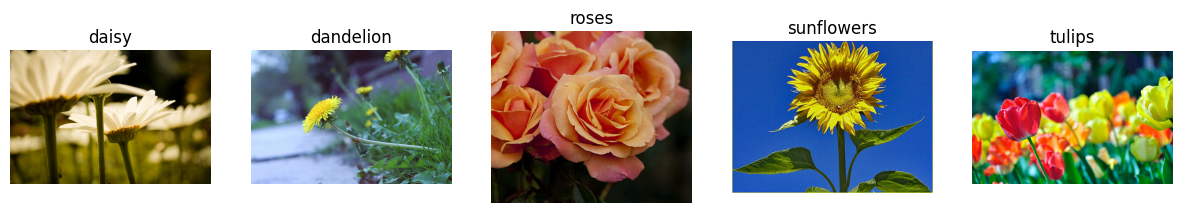

In [23]:
plt.figure(figsize=(15,5))
for i,(flower_class,images) in enumerate(flowers_images_dict.items()):
  img=PIL.Image.open(images[0])
  plt.subplot(1,len(flowers_images_dict),i+1)
  plt.imshow(img)
  plt.title(flower_class)
  plt.axis("off")
plt.show()

array([[127, 129, 132, ...,  29,  28,  28],
       [126, 128, 131, ...,  33,  31,  30],
       [126, 127, 129, ...,  35,  33,  33],
       ...,
       [ 79,  67,  58, ...,  44,  43,  44],
       [ 88,  75,  64, ...,  44,  44,  44],
       [ 95,  82,  69, ...,  44,  43,  44]], dtype=uint8)
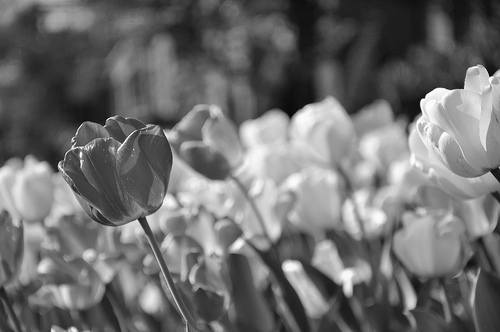

In [29]:
#RGB to gray scale
cv_img=cv2.imread(tulips[0])
cv2.cvtColor(cv_img,cv2.COLOR_BGR2GRAY)

Current shape->  (332, 500, 3)


array([[[222, 145,  60],
        [230, 152,  65],
        [230, 152,  62],
        ...,
        [ 59,  41,   1],
        [ 63,  42,   1],
        [ 57,  38,   1]],

       [[222, 145,  53],
        [225, 148,  56],
        [227, 150,  57],
        ...,
        [ 61,  45,   0],
        [ 67,  48,   2],
        [ 64,  45,   0]],

       [[222, 145,  52],
        [221, 144,  52],
        [224, 149,  58],
        ...,
        [ 63,  45,   0],
        [ 74,  50,   3],
        [ 78,  49,   5]],

       ...,

       [[ 23,  95,   0],
        [ 15,  83,   1],
        [ 21,  82,   1],
        ...,
        [ 25,  84,   1],
        [ 23,  74,   0],
        [ 27,  71,   0]],

       [[ 57, 103,   0],
        [ 18,  83,   0],
        [ 17,  79,   0],
        ...,
        [ 24,  85,   1],
        [ 19,  75,   0],
        [ 24,  69,   0]],

       [[ 98, 118,   1],
        [ 31,  88,   0],
        [ 19,  76,   1],
        ...,
        [ 26,  85,   1],
        [ 21,  75,   0],
        [ 23,  69,   0]]], dtype=uint8)
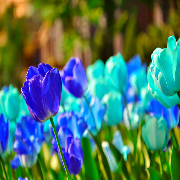

In [33]:
print("Current shape-> ",cv_img.shape)
# resizing width and height
cv2.resize(cv_img,(180,180))

In [37]:
# resizing all the images from dataset
X,y=[],[]
for flower_name,images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(image)
    resized_img=cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_images_labels[flower_name])

In [40]:
# converting into numpy array for efficiency
X=np.array(X)
y=np.array(y)